1. find $A$.
2. for what potential $V(x)$ does $\psi$ satisfy the Schrodinger equation?
3. Calculate expectation values for $x$, $x^2$, $p$, and $p^2$.
4. Find $\sigma x$ and $\sigma p$. Is their product consistent with the uncertainty principle?

Solution:

In [1]:
import sympy as sp
from sympy.physics.quantum.constants import hbar

A, a, m, V = sp.symbols('A a m, V', real=True, positive=True)
x, t = sp.symbols('x t', real=True)
psi = A*sp.exp(-a*(m*x**2/hbar+sp.I*t))

psi

##here I have simply brought my equation and all of the variables and constants into existence and assigned the equation to the variable name psi.

##I came back and limited x and t to real, which fixed my previous issue with xbar and tbar

A*exp(-a*(m*x**2/hbar + I*t))

In [2]:
import sympy as sp
sp.init_printing()
psi

##now I have created a pretty version of the equation that is mathematically legible.

In [3]:
psisq = psi*sp.conjugate(psi)
sp.simplify(psisq)
psisq



In [4]:
psisq = A**2*sp.exp(-2*a*(m*x**2/hbar))
psisq

##for some odd reason, python has created ibar in the complex conjugate, so in order to bipass this, i redefine psisq my way
##as it isnt a complicated simplification.

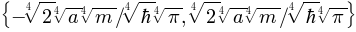

In [5]:
norm = sp.Eq(1, sp.integrate(psisq, (x, -sp.oo, sp.oo)))
sp.solveset(norm, A)

##this is the actual solution to 1). It's odd that it gives both positive and negative solutions when I specified A as positive
##and real, but it uses the positive A when i substitute into the equation later, so I'm not worried about it.

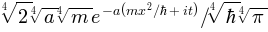

In [6]:
psi=psi.subs(A, next(iter(sp.solveset(norm, A))))
psi

##here i just replace A with our calculated normalization constant

In [7]:
SchEq = sp.Eq(sp.I*sp.diff(psi, t)/hbar, -hbar**2*sp.diff(psi, x, 2)/(2*m)+V*psi)
sp.solveset(SchEq, V)

##There we have our solution for 2). I just gave jupyter the Schrodinger Equation and told it to solve for V

In [8]:
expx = sp.integrate(x*psisq, (x, -sp.oo, sp.oo))
expx

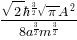

In [9]:
expxsq = sp.integrate(x**2*psisq, (x, -sp.oo, sp.oo))
expxsq

In [10]:
dpsidt = sp.conjugate(psi)*sp.diff(psi, x)*hbar/sp.I
expp = sp.integrate(sp.conjugate(psi)*sp.diff(psi, x)*hbar/sp.I, (x, -sp.oo, sp.oo))
expp

In [11]:
exppsq = m*sp.diff(sp.integrate(x**2*psisq, (x, -sp.oo, sp.oo)), t)
exppsq

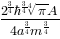

In [12]:
sigx = sp.sqrt(expxsq-expx**2)
sigx

In [13]:
sigp = sp.sqrt(exppsq-expp**2)
sigp

Apparantly this doesn't obey the uncertainty principle, because $\sigma p*\sigma x = 0$
Unless of course, exppsq is not equal to 0, which is where I'd guess my error lies.

Portfolio References:
1. Problem 1.5, for coding syntax

Index references:
1. Wavefunction
2. Schrodingers Equation
3. Normalization
4. Expected x
5. Expected p
6. Uncertainty principle

Book references:
1. Calculating expected p (chapter 1)
2. calculating expected x (chapter 1)

